Janet Illescas Coria

# Práctica 2 - Resolución espacial y de intensidad

In [19]:
# Bibliotecas para la manipulación de imágenes, matrices, crear
# números aleatorios y el manejo de archivos y directorios.
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import os

In [20]:
# Configuración de pyplot para ver las imágenes en escala de grises.
plt.rcParams['image.cmap'] = 'gray'
# Comando de Jupyter para que las imágenes se muestren automaticamente.
%matplotlib inline

### 1. Reducción de la resolución espacial

In [23]:
# Función para reducir la resolución espacial de la imagen recibida de 
# tamaño 1024x1024 (recibimos la dirección donde se encuentra el archivo de la 
# imagen). 
def reduccion_espacial(img):
    # Estaremos utilizando los bloques try y except para manejar
    # excepciones que se puedan dar.
    try: 
        # Verificamos si el archivo recibido existe, si no existe
        # lanzamos una excepción.
        if not os.path.exists(img):
            raise ValueError('No existe el archivo')
            
        # Verificamos si el archivo es png o jpg, si no es así lanzamos 
        # una excepción.
        if not img.endswith('.png') and not img.endswith('.jpg'):
            raise ValueError('El archivo debe ser png o jpg')
            
        
        # Leemos la imagen.
        img = io.imread(img)
            
        # Verificamos si la imagen tiene el tamaño que se requiere,
        # si no es así lanzamos una excepción.
        if img.shape != (1024, 1024):
            raise ValueError('La imagen dede ser de 1024 x 1024 pixeles')
        
        # Creamos matrices llenas de ceros de los tamaños a los que 
        # será reducida la imagen (512, 256, 128, 64).
        img1 = np.zeros((512, 512))
        img2 = np.zeros((256, 256))
        img3 = np.zeros((128, 128))
        img4 = np.zeros((64, 64))

        # Creamos una lista que contendrá a todas las imágenes
        # de diferentes tamaños.
        imgs = [img, img1, img2, img3, img4]

        # Para procesar las 4 imágenes vacías creamos un ciclo
        # for. 
        for i in range(1, 5):
            # Obtenemos el rango espacial de la imagen i.
            rango_yx = imgs[i].shape
            # Recorremos la imagen i pixel por pixel.
            for y in range(0, rango_yx[0]):
                for x in range(0, rango_yx[1]):
                    # Le asignamos su valor correspondiente de la imagen
                    # anterior (que tiene exactamente el doble de tamaño),
                    # por eso sus coordenadas se obtienen multiplicando 
                    # las coordenadas actuales por 2.
                    imgs[i][y][x] = imgs[i-1][y*2][x*2]
            
        # Eliminamos la primer imagen de la lista, ya que es la original.
        imgs.pop(0)
                
        # Regresamos nuestro conjunto de imágenes ya procesadas.
        return imgs
    
    # Si ocurre algún error se muestra.
    except ValueError as e:
            print(f"Error: {e}")


In [24]:
# Ejecutamos la función reduccion_espacial() con la dirección de la imagen
# rosa1024.jpg. Guardamos el conjunto de imágenes ya reducidas en la 
# variable imgs_reducidas_e.
imgs_reducidas_e = reduccion_espacial('imagenes/rosa1024.jpg')

### 2. Despliegue de imágenes reducidas espacialmente

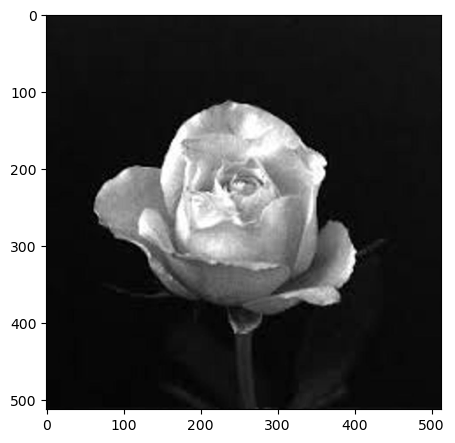

<Figure size 640x480 with 0 Axes>

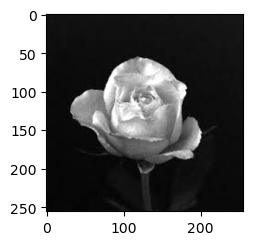

<Figure size 640x480 with 0 Axes>

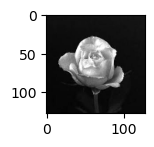

<Figure size 640x480 with 0 Axes>

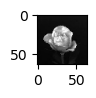

<Figure size 640x480 with 0 Axes>

In [25]:
# Recorremos las imágenes reducidas espacialemente.
for img in imgs_reducidas_e:
    # Creamos una figura con un tamaño que se ajusta al número de 
    # píxeles de la imagen. Dividimos las dimensiones entre 100 para
    # obtener una escala razonable en pulgadas.
    plt.figure(figsize=(img.shape[1]/100, img.shape[0]/100))
    # Desplegamos la imagen
    plt.imshow(img)
    # Creamos otra figura para poder mostrar otra imagen, sino el 
    # proximo imshow sobreescribe al anterior.
    plt.figure()

### 3. Zoom con el método vecino más cercano

In [7]:
# Función para hacer zoom a 1024x1024 pixeles de la imagen recibida con
# el método del vecino más cercano.
# Recibimos imagen como un arreglo numpy (matriz).
def zoom_vecino_mas_cercano(img):
    try: 
        # Verificamos si la imagen recibida es un arreglo numpy, sino 
        # lanzamos una excepción.
        if not isinstance(img, np.ndarray):
            raise ValueError('La imagen debe ser una instancia numpy.ndarray')
            
        # Creamos una matriz llenas de ceros de tamaño 1024x1024.
        img_z = np.zeros((1024, 1024))
        
        # Obtenemos el factor necesario para escalar el tamaño de la
        # imagen recibida a un tamaño de 1024.
        multiplo = 1024 // img.shape[0]
        # Recorremos la imagen pixel por pixel.
        for y in range(0, 1024):
            for x in range(0, 1024):
                # Le asignamos su valor correspondiente de la imagen
                # original dividiendo la coordenada entre el factor 
                # obtenido anteriormente. Al ser una división entera 
                # obtendremos la coordenada correspondiente al vecino
                # más cercano.
                img_z[y][x] = img[y//multiplo][x//multiplo]
               
        # Regresamos la imagen con un zoom a 1024x1024 pixeles.
        return img_z
    
    except ValueError as e:
            print(f"Error: {e}")
    

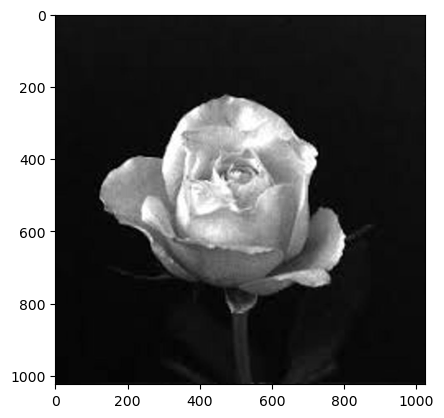

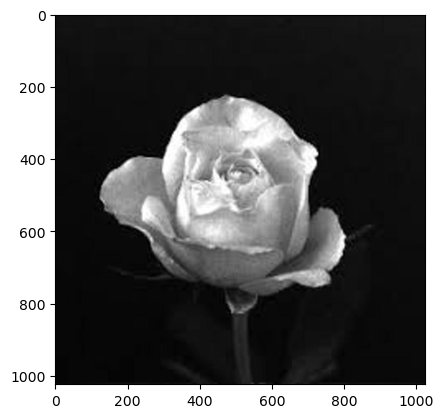

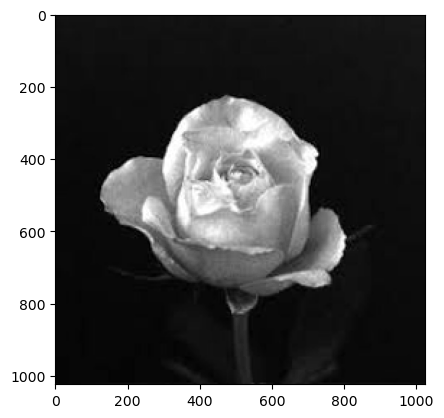

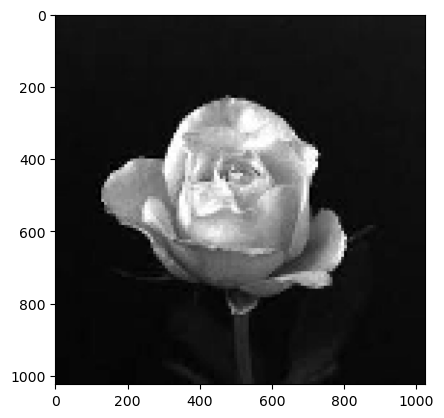

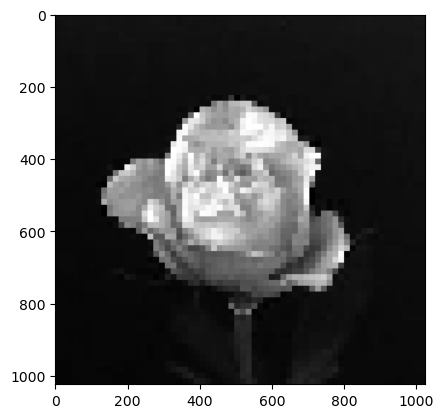

<Figure size 640x480 with 0 Axes>

In [8]:
# Recorremos las imágenes reducidas en el ejercicio anterior.
for img in imgs_reducidas_e:
    # Realizamos el zoom a 1024x1024 pixeles de cada imagen.
    zoom = zoom_vecino_mas_cercano(img)
    # Desplegamos la imagen con zoom.
    plt.imshow(zoom)
    plt.figure()

### 4. Reducción de la resolución de intensidad

In [29]:
# Función para reducir la resolución de intensidad a 128, 64, 32, 16, 8,
# 4 y 2 de la imagen recibida (recibimos la dirección donde se encuentra
# el archivo de la imagen). 
def reduccion_intensidad(img):
    try: 
        # Verificamos si el archivo recibido existe, si no existe
        # lanzamos una excepción.
        if not os.path.exists(img):
            raise ValueError('No existe el archivo')
            
        # Verificamos si el archivo es png o jpg, si no es así lanzamos 
        # una excepción.
        if not img.endswith('.png') and not img.endswith('.jpg'):
            raise ValueError('El archivo debe ser png o jpg')
        
        # Leemos la imagen.
        img = io.imread(img) 
        # Creamos una lista vacía en la que almacenaremos las imágenes con 
        # las intensidades que debe generar la función.
        imgs = []

        # Lista de intensidades que se deben generar.
        intensidades = [128, 64, 32, 16, 8, 4, 2]

        # Recorremos la lista de intensidades.
        for i in intensidades:
            # Creamos una matriz llena de ceros del tamaño de la imagen 
            # recibida.
            nueva_img = np.zeros(img.shape)
            # Recorremos los pixeles de la matriz.
            for y in range(0, img.shape[0]):
                for x in range(0, img.shape[1]):
                    # Le asignamos el nuevo valor de intensidad al pixel.
                    # Obtenemos el nuevo valor dividiendo la intensidad
                    # anterior entre 255 para generar un número entre 0
                    # y 1, luego es multiplicado por la intensidad a la
                    # que se debe escalar menos uno (ya que se considera 
                    # al 0), como se pueden obtener números decimales 
                    # hacemos un redondeo para que el valor sea entero.
                    nueva_img[y][x] = round(img[y][x] / 255 * (i-1))
                    
            # Agregamos la imagen ya procesada a la lista de imágenes.
            imgs.append(nueva_img)
            
        # Regresamos la lista de imágenes ya procesadas.
        return imgs
            
    except ValueError as e:
        print(f"Error: {e}")
    

In [30]:
# Ejecutamos la función reduccion_intensidad() con la dirección de la 
# imagen X_raySkull.png. Guardamos el conjunto de imágenes ya reducidas a
# diferentes intensidades en la variable imgs_reducidas_i.
imgs_reducidas_i = reduccion_intensidad('imagenes/X_raySkull.png')

### 5. Despliegue de imágenes reducidas en intensidad

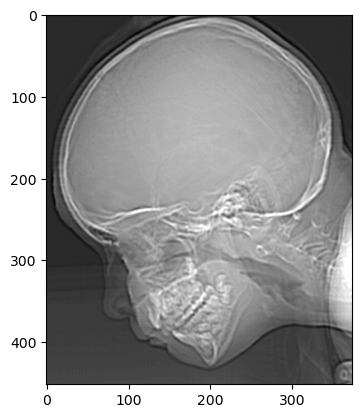

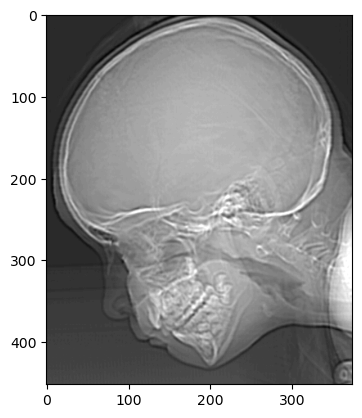

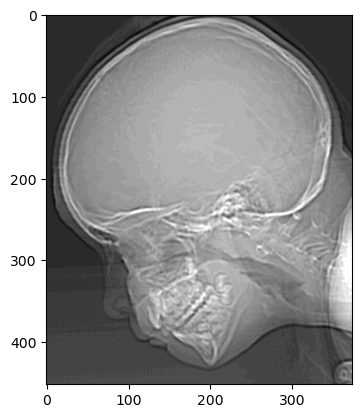

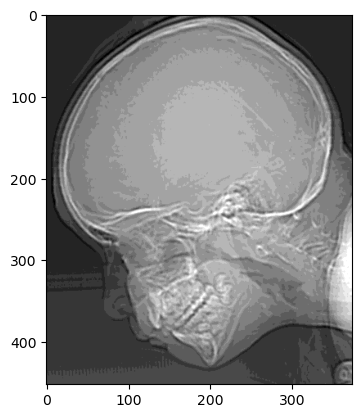

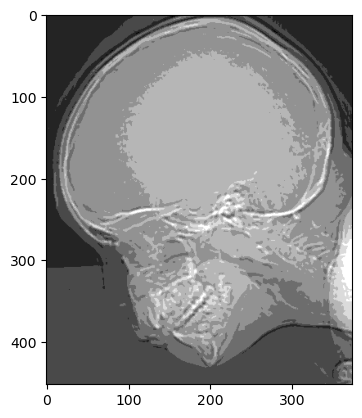

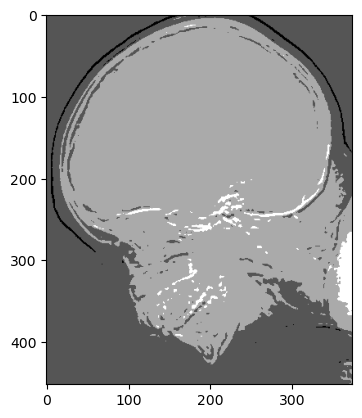

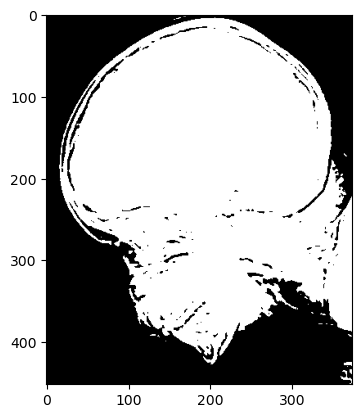

<Figure size 640x480 with 0 Axes>

In [31]:
# Recorremos las imágenes reducidas en intensidad.
for img in imgs_reducidas_i:
    # Desplegamos la imagen
    plt.imshow(img)
    plt.figure()

### 6. Determina pixeles 4-adyacentes y 8-adyacentes

In [12]:
# Función para obtener las 4-adyacencias y 8-adyacencias de cinco
# pixeles generados de forma aleatoria a partir de la imagen recibida 
# (recibimos la dirección donde se encuentra el archivo de la imagen).
def crea_ady(img):
    try: 
        # Verificamos si el archivo recibido existe, si no existe
        # lanzamos una excepción.
        if not os.path.exists(img):
            raise ValueError('No existe el archivo')
            
        # Verificamos si el archivo es png o jpg, si no es así lanzamos 
        # una excepción.
        if not img.endswith('.png') and not img.endswith('.jpg'):
            raise ValueError('El archivo debe ser png o jpg')
            
        # Leemos la imagen.
        img = io.imread(img) 
        
        # Creamos una lista vacía donde almacenaremos los pixeles 
        # generados aleatoriamente.
        pixeles = []

        # Con un ciclo for generamos 5 pixeles.
        for i in range (0, 5):
            # Obtenemos la coordenada en y de forma aleatoria.
            y = random.randint(0, img.shape[0]-1)
            # Obtenemos la coordenada en x de forma aleatoria.
            x = random.randint(0, img.shape[1]-1)
            # Agregamos el pixel obtenido con las coordenadas anteriores
            # a la lista de pixeles.
            pixeles.append((y, x))
    
        # Creamos una lista para almacenar las cuatro adyacencias de
        # cada pixel.
        cuatro_ady = []
        # Recorremos nuestra lista de pixeles.
        for p in pixeles:
            # Creamos una lista para almacenar las cuatro adyacencias
            # del pixel p.
            pixeles_4_ady = []
            # Agregamos las cuatro adyacencias a la lista.
            pixeles_4_ady.append((p[0]-1, p[1]))
            pixeles_4_ady.append((p[0]+1, p[1]))
            pixeles_4_ady.append((p[0], p[1]-1))
            pixeles_4_ady.append((p[0], p[1]+1))
            # Agregamos a lista de adyacencias del pixel a la lista de
            # las adyacencias de todos los pixeles.
            cuatro_ady.append(pixeles_4_ady)
        
        # Creamos una lista para almacenar las ocho adyacencias de cada
        # pixel.
        ocho_ady = []
        # Recorremos nuestra lista de pixeles.
        for p in pixeles:
            # Creamos una lista para almacenar las ocho adyacencias del
            # pixel p.
            pixeles_8_ady = []
            # Agregamos las ocho adyacencias a la lista.
            pixeles_8_ady.append((p[0]-1, p[1]))
            pixeles_8_ady.append((p[0]+1, p[1]))
            pixeles_8_ady.append((p[0], p[1]-1))
            pixeles_8_ady.append((p[0], p[1]+1))
            pixeles_8_ady.append((p[0]-1, p[1]-1))
            pixeles_8_ady.append((p[0]-1, p[1]+1))
            pixeles_8_ady.append((p[0]+1, p[1]-1))
            pixeles_8_ady.append((p[0]+1, p[1]+1))
            # Agregamos a lista de adyacencias del pixel a la lista de
            # las adyacencias de todos los pixeles.
            ocho_ady.append(pixeles_8_ady)
            
        # Creamos una tupla que almacene la lista de pixeles, la lista
        # de sus cuatro adyacencias y la lista de sus ocho adyacencias.
        ady = (pixeles, cuatro_ady, ocho_ady)
        # Regresamos la tupla con los pixeles y sus adyacencias.
        return ady
    
    except ValueError as e:
        print(f"Error: {e}")
        

In [13]:
# Ejecutamos la función crea_ady() con la dirección de la 
# imagen cuadro.png. Guardamos el conjunto de información de los pixeles
# generados y sus adyacencias en la variable info.
info = crea_ady('imagenes/cuadro.png')
# Separamos la información en variables independientes para un manejo
# más simple.
pixeles = info[0]
cuatro_ady = info[1]
ocho_ady = info[2]

### 7. Despliegue de vecindades obtenidas

In [14]:
# Función que marca las vecindades recibidas a la imagen, también 
# recibida como dirección donde se encuentra el archivo de la imagen.
def agregar_vecindades(img, vecindades):
    try: 
        # Verificamos si el archivo recibido existe, si no existe
        # lanzamos una excepción.
        if not os.path.exists(img):
            raise ValueError('No existe el archivo')
            
        # Verificamos si el archivo es png o jpg, si no es así lanzamos 
        # una excepción.
        if not img.endswith('.png') and not img.endswith('.jpg'):
            raise ValueError('El archivo debe ser png o jpg')
            
        # Leemos la imagen.
        img = io.imread(img) 
        
        # Verificamos que las vecindades esten en una lista, si no es así
        # lazamos una excepción.
        if not isinstance(vecindades, list):
            raise ValueError('Las vecindades deben estar en una lista')
            
        # Recorremos las vecindades de cada pixel.
        for vecindad_p in vecindades:
            
            # Verificamos que la vecindad sea una lista, si no es así
            # lanzamos una excepción.
            if not isinstance(vecindad_p, list):
                raise ValueError('Las vecindades deben ser una lista')

            # Recorremos la vecindad del pixel p.
            for v in vecindad_p:
                # Verificamos que el vecino sea una tupla de dos enteros, 
                # si no es así lanzamos una excepción.
                if not isinstance(v, tuple):
                    raise ValueError('Los vecinos deben ser una tupla')
                if len(v) != 2:
                    raise ValueError('Los vecinos deben tener 2 coordenadas')
                if not isinstance(v[0], int) or not isinstance(v[1], int):
                    raise ValueError('Las coordenadas deben ser enteros')
                
                # Verificamos que el vecino no se encuentre fuera del 
                # rango espacial de la imagen.
                if v[0] >= 0 and v[0] < img.shape[0] and v[1] >= 0 and v[1] < img.shape[1]:
                    # Colorea de negro al vecino v.
                    img[v[0]][v[1]] = 0
                
        # Regresamos la imagen con las vecindades marcadas.
        return img
    
    except ValueError as e:
        print(f"Error: {e}")
        

<Figure size 640x480 with 0 Axes>

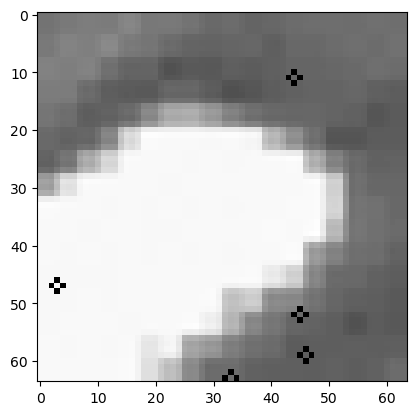

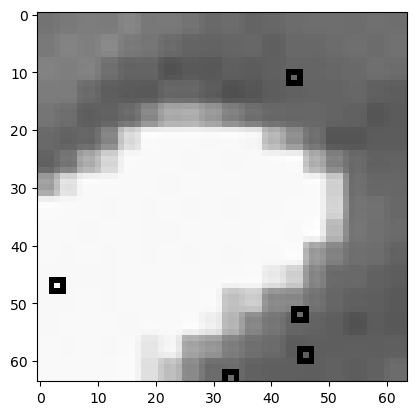

<Figure size 640x480 with 0 Axes>

In [15]:
# Ejecutamos la función agregar_vecindades() con la dirección de la 
# imagen cuadro.png y las 4-vecindades obtenidas en el ejercicio 
# anterior. Guardamos la imagen con las vecindades marcadas.
cuadro = agregar_vecindades('imagenes/cuadro.png', cuatro_ady)
# Desplegamos la imagen con las 4-vecindades
plt.imshow(cuadro)
plt.figure()

# Ejecutamos la función agregar_vecindades() con la dirección de la 
# imagen cuadro.png y las 8-vecindades obtenidas en el ejercicio 
# anterior. Guardamos la imagen con las vecindades marcadas.
cuadro = agregar_vecindades('imagenes/cuadro.png', ocho_ady)
# Desplegamos la imagen con las 8-vecindades
plt.imshow(cuadro)
plt.figure()

### 8. Calcula las distancias City block y Chessbord entre pixeles

In [16]:
# Función que calcula las distancia City block entre dos pixeles 
# recibidos (tuplas de dos coordenadas).
def city_block(p1, p2):
    try:
        # Verificamos que los pixeles sean tuplas de dos enteros, si no 
        # es así lanzamos una excepción.
        if not isinstance(p1, tuple) or not isinstance(p2, tuple):
            raise ValueError('Los pixeles deben ser tuplas')
        if len(p1) != 2 or len(p2) != 2:
            raise ValueError('Los pixeles deben tener 2 coordenadas')
        if not isinstance(p1[0], int) or not isinstance(p1[1], int) or not isinstance(p2[0], int) or not isinstance(p2[1], int):
            raise ValueError('Las coordenadas deben ser enteros')
        
        # Regresamoa la distancia City block entre ambos pixeles.
        return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])
        
    except ValueError as e:
        print(f"Error: {e}")


In [17]:
# Función que calcula las distancia Chessbord entre dos pixeles 
# recibidos (tuplas de dos coordenadas).
def chessbord(p1, p2):
    try:
        # Verificamos que los pixeles sean tuplas de dos enteros, si no 
        # es así lanzamos una excepción.
        if not isinstance(p1, tuple) or not isinstance(p2, tuple):
            raise ValueError('Los pixeles deben ser tuplas')
        if len(p1) != 2 or len(p2) != 2:
            raise ValueError('Los pixeles deben tener 2 coordenadas')
        if not isinstance(p1[0], int) or not isinstance(p1[1], int) or not isinstance(p2[0], int) or not isinstance(p2[1], int):
            raise ValueError('Las coordenadas deben ser enteros')
        
        # Regresamoa la distancia Chessbord entre ambos pixeles.
        return max(abs(p1[0] - p2[0]),abs(p1[1] - p2[1]))
        
    except ValueError as e:
        print(f"Error: {e}")

In [18]:
# Pixeles con los que estaremos trabajando (los resulantantes del
# ejericio anterior).
px = pixeles
    
# Desplegamos las distancias City Block del primer pixel a los demás.
print(f'Distancias City Block desde ({px[0][0]}, {px[0][1]}):')
# Recorremos los pixeles, sin contar el primero.
for i in range(1, 5):
    # Calculamos e imprimimos la distancia al pixel i.
    print(f'  ({px[i][0]}, {px[i][1]}): {city_block(px[0], px[i])}')
    
# Desplegamos las distancias Chessbord del primer pixel a los demás.
print(f'Distancias Chessbord desde ({px[0][0]}, {px[0][1]}):')
# Recorremos los pixeles, sin contar el primero.
for i in range(1, 5):
    # Calculamos e imprimimos la distancia al pixel i.
    print(f'  ({px[i][0]}, {px[i][1]}): {chessbord(px[0], px[i])}')


Distancias City Block desde (63, 33):
  (52, 45): 23
  (11, 44): 63
  (59, 46): 17
  (47, 3): 46
Distancias Chessbord desde (63, 33):
  (52, 45): 12
  (11, 44): 52
  (59, 46): 13
  (47, 3): 30
